In [5]:
import pandas as pd
import numpy as np

# Load the dataset
e_commerce_data = pd.read_csv('ecommerce_data.csv', encoding='latin-1')  
# Explore the structure of the dataset
print(e_commerce_data.head())
print(e_commerce_data.info())
print(e_commerce_data.describe())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo   

In [7]:
e_commerce_data = e_commerce_data.replace([np.inf, -np.inf], np.nan)
e_commerce_data['TotalPrice'] = e_commerce_data['Quantity'] * e_commerce_data['UnitPrice']
e_commerce_data['UnitPriceAvg'] = e_commerce_data.groupby('StockCode')['UnitPrice'].transform('mean')
e_commerce_data = e_commerce_data[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'UnitPriceAvg', 'CustomerID', 'TotalPrice', 'Country']]

e_commerce_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,UnitPriceAvg,CustomerID,TotalPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,3.103238,17850.0,15.30,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,4.777493,17850.0,20.34,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,4.254966,17850.0,22.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,5.176540,17850.0,20.34,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,5.068208,17850.0,20.34,United Kingdom
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,1.006757,12680.0,10.20,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,2.430906,12680.0,12.60,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,4.261937,12680.0,16.60,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,4.342099,12680.0,16.60,France


In [8]:
# Missing values
# Missing the CustomerID

e_commerce_data[e_commerce_data['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,UnitPriceAvg,CustomerID,TotalPrice,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,5.680947,NaN,0.00,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,1.769207,NaN,2.51,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,1.917394,NaN,5.02,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,0.659916,NaN,3.40,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,1.049167,NaN,3.32,United Kingdom
...,...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,2.470264,NaN,20.65,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,2.593406,NaN,16.52,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,3.060823,NaN,4.96,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,6.935305,NaN,10.79,United Kingdom


In [9]:
# Missing Description

e_commerce_data[e_commerce_data['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,UnitPriceAvg,CustomerID,TotalPrice,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,5.680947,NaN,0.0,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,0.000000,NaN,0.0,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,0.700000,NaN,0.0,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,1.275000,NaN,0.0,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,0.000000,NaN,0.0,United Kingdom
...,...,...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,3.760323,NaN,-0.0,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,6.965086,NaN,0.0,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,2.006971,NaN,0.0,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,1.208274,NaN,0.0,United Kingdom


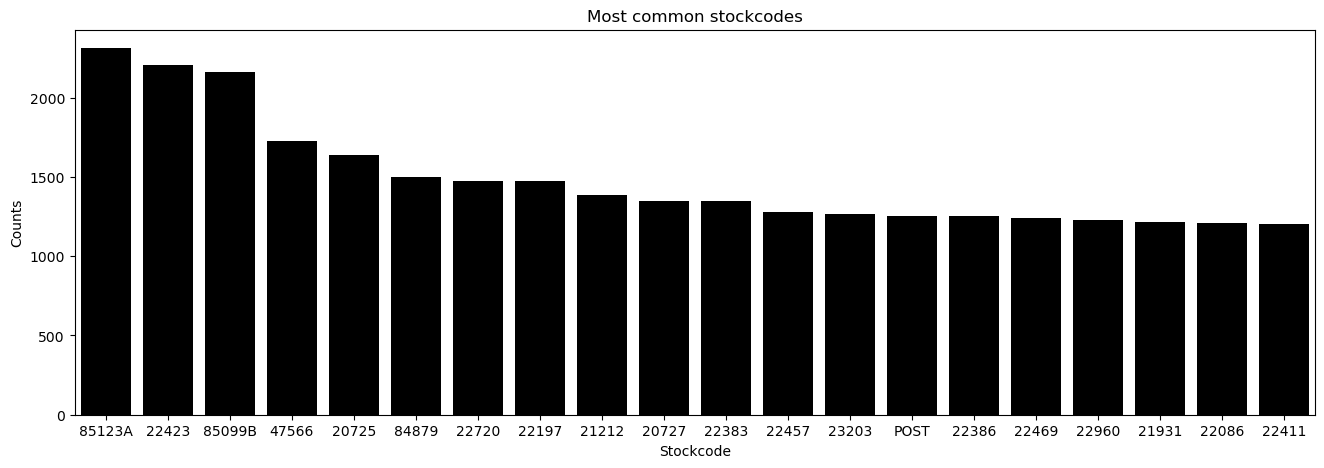

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

stockcode_counts = e_commerce_data['StockCode'].value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(16, 5))
sns.barplot(x=stockcode_counts.iloc[0:20].index, y=stockcode_counts.iloc[0:20].values, color='black', ax=ax)
ax.set_ylabel("Counts")
ax.set_xlabel("Stockcode")
ax.set_title("Most common stockcodes");

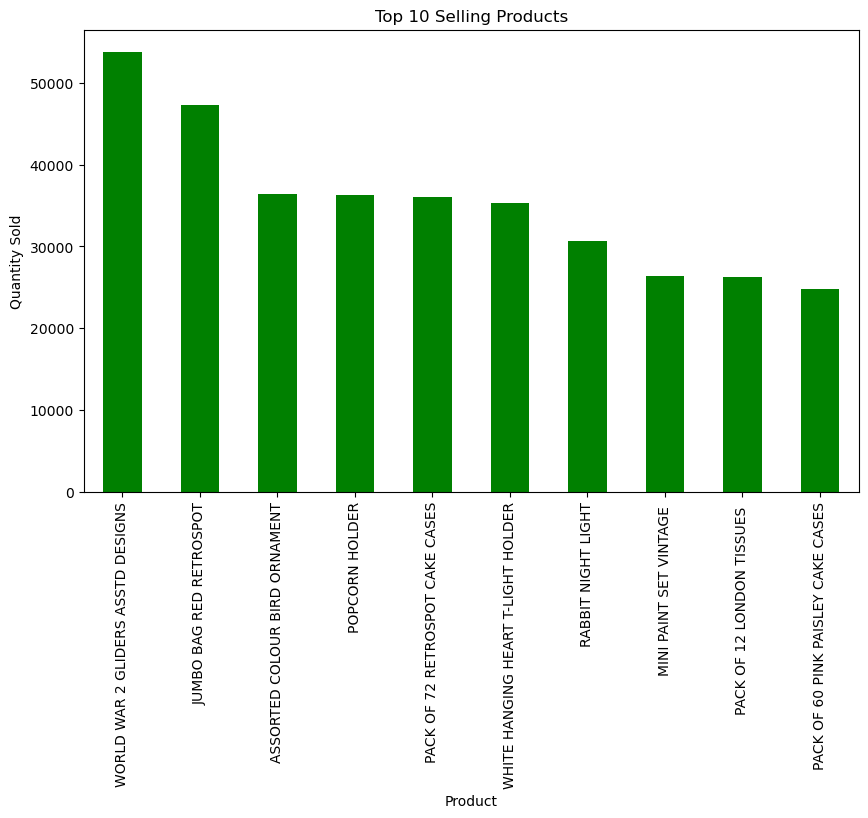

In [20]:
# Find the top 10 selling products
top_products = df.groupby('Description')['Quantity'].sum().nlargest(10)

# Plot top products
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='g')
plt.title('Top 10 Selling Products')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.show()


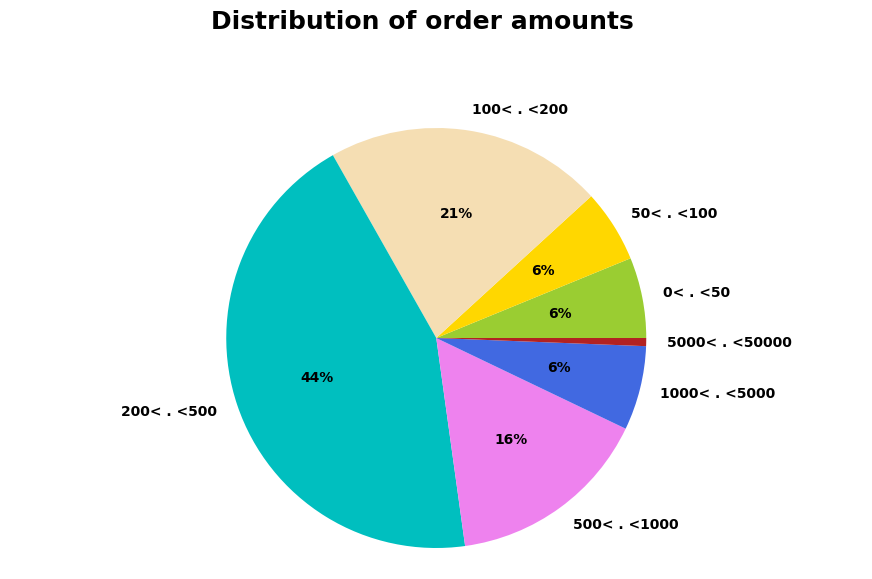

In [22]:
total_price_per_invoice = e_commerce_data.groupby(['CustomerID', 'InvoiceNo', 'InvoiceDate'])['TotalPrice'].sum().reset_index()
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []

for i, price in enumerate(price_range):
    if i == 0: continue
    val = total_price_per_invoice[(total_price_per_invoice['TotalPrice'] < price) & (total_price_per_invoice['TotalPrice'] > price_range[i-1])]['TotalPrice'].count()
    count_price.append(val)
      
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ f'{price_range[i-1]}< . <{s}' for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x: f'{x:1.0f}%' if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Distribution of order amounts", ha='center', fontsize=18);

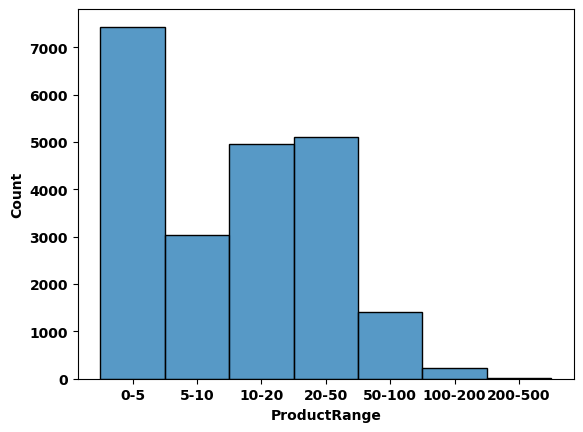

In [34]:
bins = [0, 5, 10, 20, 50, 100, 200, 500]
labels = ['0-5', '5-10', '10-20', '20-50', '50-100', '100-200', '200-500']

temp = e_commerce_data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket['ProductRange'] = pd.cut(nb_products_per_basket['Number of products'], bins=bins, labels=labels)
grouped = nb_products_per_basket.groupby('ProductRange', observed=True).size()

sns.histplot(data=nb_products_per_basket, x='ProductRange', bins=10, kde=False);

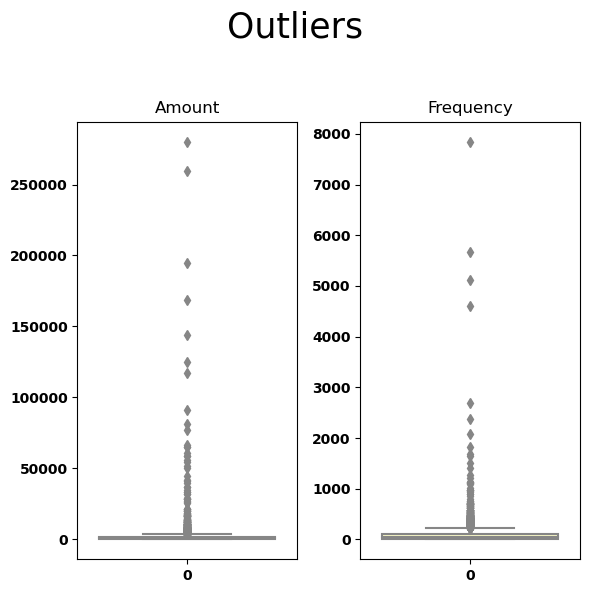

In [37]:
df = e_commerce_data.loc[e_commerce_data["Quantity"] > 0]
df = df.loc[df["UnitPrice"] > 0]

Amount = df.groupby('CustomerID')['TotalPrice'].sum()
Amount = Amount.reset_index()
Amount.columns = ['CustomerID', 'Amount']

Frequency = df.groupby('CustomerID')['InvoiceNo'].count()
Frequency = Frequency.reset_index()
Frequency.columns = ['CustomerID', 'Frequency']

df1 = pd.merge(Amount, Frequency, on='CustomerID', how='inner')
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(6,6))
fig.suptitle('Outliers\n', size = 25)

sns.boxplot(ax=axes[0], data=df1['Amount'], palette='Spectral').set_title("Amount")
sns.boxplot(ax=axes[1], data=df1['Frequency'], palette='Spectral').set_title("Frequency")

plt.tight_layout()